Lugar das Raízes - Tabela com a solução do exercício do slide 10 (último slide da apresentação sobre lugar das raízes) onde G(z) = FTMA(z)

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 10000
import control                   
import math
import cmath
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from control_utils import *
from control.matlab import lsim

T  \
0  0.1   
1  0.5   
2  1.0   
3  2.0   

                                                                              G(z)  \
0  \n      0.09516 z\n----------------------\nz^2 - 1.905 z + 0.9048\n\ndt = 0.1\n   
1  \n       0.3935 z\n----------------------\nz^2 - 1.607 z + 0.6065\n\ndt = 0.5\n   
2    \n       0.6321 z\n----------------------\nz^2 - 1.368 z + 0.3679\n\ndt = 1\n   
3    \n       0.8647 z\n----------------------\nz^2 - 1.135 z + 0.1353\n\ndt = 2\n   

    Kcritico  \
0  40.034003   
1   8.170816   
2   4.330432   
3   2.630262   

                                                                                        polos  
0      [(0.8572561270539394+0.41224913664486945j), (0.8572561270539394-0.41224913664486945j)]  
1            [(0.40979598956895+0.6622672471486403j), (0.40979598956895-0.6622672471486403j)]  
2    [(0.051819161757163466+0.6043130113163436j), (0.051819161757163466-0.6043130113163436j)]  
3  [(-0.29699707514508106+0.21708989057963934j), (-0.29699707514508106-0.21708989057963934j)]

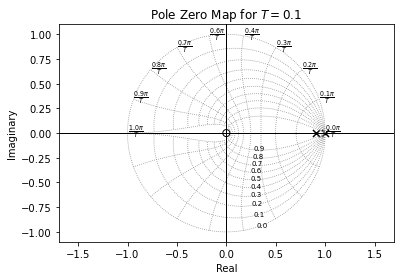

In [2]:
table = []
for T in [0.1, 0.5, 1, 2]:
    Gsistema = control.tf(1,[1,1]);
    Gcontrolador = control.tf([1, 0],[1,-1], T)
    FTMA = control.c2d(Gsistema,T)*Gcontrolador
    plt.figure()
    control.pzmap(FTMA, grid=True)
    plt.title(f'Pole Zero Map for $T={T}$')
    
    # Identificar o ganho crítico
    k = np.linspace(0.01,100,5000);
    j = 0;
    maior_polo = 0;
    while (maior_polo <= 1):
        FTMF = control.feedback(k[j]*FTMA,1)
        polos = control.pole(FTMF);
        maior_polo = max(abs(polos));
        Kcritico = k[j];
        j = j+1;
        
    # polos para ganho 2
    k=2
    FTMF = control.feedback(k*FTMA,1)
    polos = control.pole(FTMF);
    
    table.append([T, FTMA, Kcritico, polos])
pd.DataFrame(table, columns=['T', 'G(z)', 'Kcritico', 'polos'])

In [3]:
x,y = control.step_response(FTMF)
plt.plot(x,y)